In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
#gen data

numObjects = 6
numTimesteps = 27
times = np.arange(numTimesteps)
objPosArr = np.empty([numObjects,2,numTimesteps])

for i in range(numObjects):
    x = np.linspace(np.random.random()+np.random.randint(0,10), 10*np.random.random()-np.random.randint(2,5), numTimesteps)
    y = np.linspace(np.random.random()+np.random.randint(0,4), 12*np.random.random(), numTimesteps)
    objPosArr[i,0] = x
    objPosArr[i,1] = y


limits = [0,np.max(objPosArr)+1,0, np.max(objPosArr)+1]

In [3]:
def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

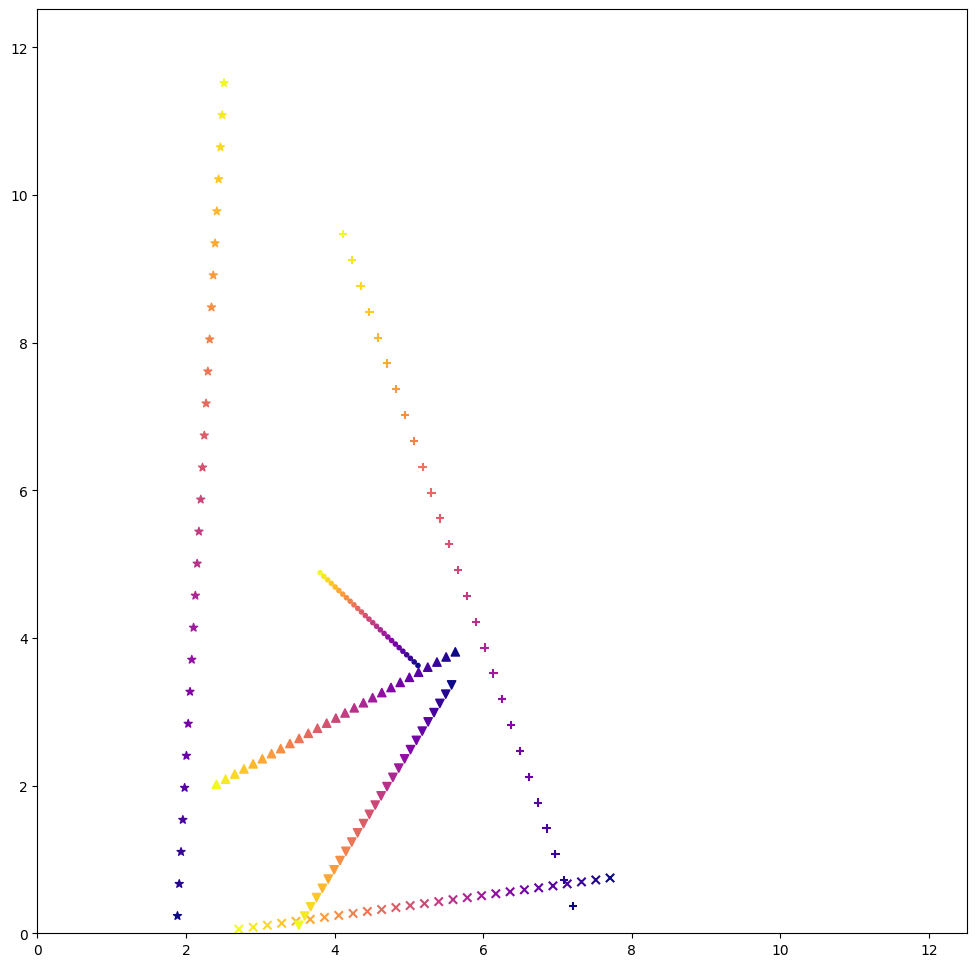

In [4]:
plotExpectedPos(objPosArr, times, limits)

TESS 27	07/04/20-07/30/20	326.85, -72.43, 214.51	301.60, -38.68, 282.66	312.45, -61.74, 291.17	8.60, -79.81, 165.21	90.01, -66.56, 244.53	

In [5]:
from find_asteroid import Skybotquery
from find_asteroid import MPCquery
import pandas as pd
ra, dec = 301.60, -38.68

#dates to JD?

date = 2458957.0 #17/04/20

# resultSB = Skybotquery(ra, dec, date, location="tess")

resultMP = MPCquery(ra,dec,date, 300, limit="20.0",obscode="C57")
resultMP.drop(resultMP.tail(1).index, inplace=True)

array([58956., 58961., 58966., 58971., 58976.])

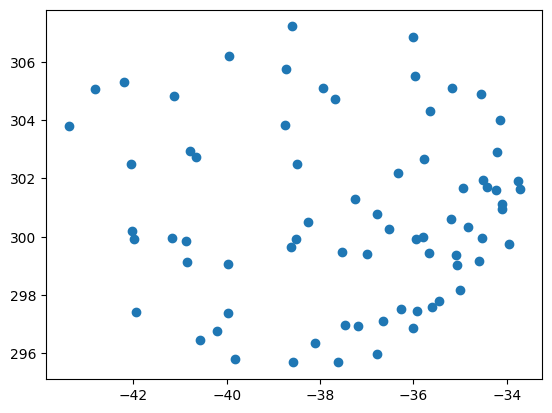

In [63]:
from astropy.coordinates import SkyCoord
import astropy.units as u
# import astropy.wcs as wcs
# from astropy.wcs import WCS
from astropy.time import Time

coords = SkyCoord(resultMP["RA"], resultMP["Dec"], unit=(u.hourangle,u.deg))

tabCor = coords.to_table()

plt.scatter(coords.dec, coords.ra)


t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 5*u.day

timeList = t_i + dt*np.arange(0,5)
timeList.mjd

In [148]:
ra, dec = 301.60, -38.68

t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = 1*u.day

timeList = t_i + dt*np.arange(0,27)


resList = []
for i in timeList.jd:  
    queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
    resList.append(queryRes)



In [6]:
namesList = []

for i in range(len(resList)):
    namesList.append(resList[i]["name"])

namesList = [resList[i]["name"] for i in range(len(resList))]

names = pd.concat(namesList)

unqNames = pd.unique(names)

unqNames = np.delete(unqNames, np.where(unqNames==""))

In [150]:
valList = []
for j, name in enumerate(unqNames):    
    if name == "":
        continue
    raList = []
    decList = []
    for i in range(len(resList)):
        df = resList[i]
        index= df.index[df["name"]==name]
        try:
            raList.append(df.iloc[index[0]]["RA"])
            decList.append(df.iloc[index[0]]["Dec"])
        except:
            raList.append(np.nan)
            decList.append(np.nan)
        

    valList.append([name, raList, decList])



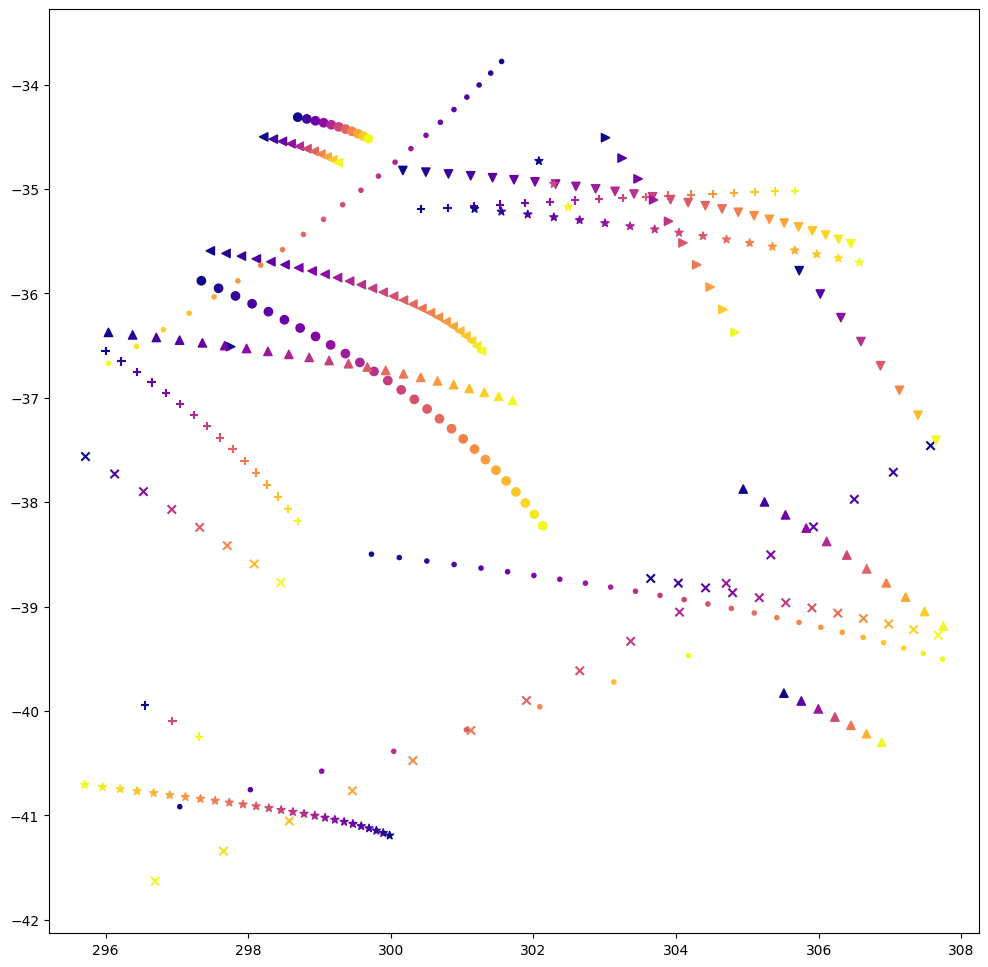

In [152]:
numObjects = unqNames.shape[0]-1
numTimesteps = 27
objPosArr = np.empty([numObjects,2,numTimesteps])


for i in range(numObjects):
    ra = valList[i][1]
    dec = valList[i][2]

    coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
    objPosArr[i,0] = coords.ra
    objPosArr[i,1] = coords.dec


limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



plotExpectedPos(objPosArr, timeList.jd, limits)



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from find_asteroid import MPCquery
import pandas as pd


def plotExpectedPos(posArr, times, lims):
    fig, ax = plt.subplots(1,figsize =(12,12))

    
    ax.set_xlim([lims[0],lims[1]])
    ax.set_ylim([lims[2],lims[3]])

    markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
    for i in range(posArr.shape[0]):
        ax.scatter(posArr[i,0],posArr[i,1], marker=next(markers), c=times, cmap="plasma")

ra_i, dec_i = 301.60, -38.68
numTimesteps = 3
t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')

t_i.mjd

dt = (27/numTimesteps)*u.day

timeList = t_i + dt*np.arange(0,numTimesteps)

# resList = []
# for i in timeList.jd:  
#     queryRes = MPCquery(ra,dec,i, 300, limit="18.0",obscode="C57")
#     resList.append(queryRes)

# namesList = []
# for i in range(len(resList)):
#     namesList.append(resList[i]["name"])
# namesList = [resList[i]["name"] for i in range(len(resList))]
# names = pd.concat(namesList)
# unqNames = pd.unique(names)


# valList = []
# for j, name in enumerate(unqNames):    
#     if name == "":
#         continue
#     raList = []
#     decList = []
#     for i in range(len(resList)):
#         df = resList[i]
#         index= df.index[df["name"]==name]
#         try:
#             raList.append(df.iloc[index[0]]["RA"])
#             decList.append(df.iloc[index[0]]["Dec"])
#         except:
#             raList.append(np.nan)
#             decList.append(np.nan)
#     valList.append([name, raList, decList])

# numObjects = unqNames.shape[0]-1
# objPosArr = np.empty([numObjects,2,numTimesteps])

# for i in range(numObjects):
#     ra = valList[i][1]
#     dec = valList[i][2]

#     coords = SkyCoord(ra, dec, unit=(u.hourangle,u.deg))
#     objPosArr[i,0] = coords.ra
#     objPosArr[i,1] = coords.dec


# limits = [np.nanmin(objPosArr[:,0,:])-0.5,np.nanmax(objPosArr[:,0,:])+0.5,np.nanmin(objPosArr[:,1,:])-0.5,np.nanmax(objPosArr[:,1,:])+0.5]



# plotExpectedPos(objPosArr, timeList.jd, limits)


In [20]:
from find_asteroid import Skybotquery
from find_asteroid import MPCquery
from astropy.time import Time
import astropy.units as u
import numpy as np

ra_i, dec_i = 301.60, -38.68
numTimesteps = 27
t_i=Time("2020-04-17T00:00:00.000", format='isot', scale='utc')
dt = (27/numTimesteps)*u.day

timeList = t_i + dt*np.arange(0,numTimesteps)


result = Skybotquery(ra_i, dec_i, timeList.jd, radius=10, location="C57")
brightResult = result.loc[result["Mv"]<= 20]

# queryRes = MPCquery(ra_i,dec_i,t_i, 300, limit="18.0",obscode="C57")




Querying for SSOs:   4%|▎         | 1/27 [00:03<01:35,  3.68s/it]/home/users/ble61/Documents/ASTR480/Test Code/find_asteroid.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
Querying for SSOs:   7%|▋         | 2/27 [00:06<01:12,  2.91s/it]/home/users/ble61/Documents/ASTR480/Test Code/find_asteroid.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
Querying for SSOs:  11%|█         | 3/27 [00:08<01:04,  2.68s/it]/home/users/ble61/Documents/ASTR480/Test Code/find_asteroid.py:129: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
Querying for SSOs:  15%|█▍        | 4/27 [00:10<00:59,  2.60s/it]/home/users/ble61/Documents/ASTR480/Test Code/find_asteroid.py:129: Fut

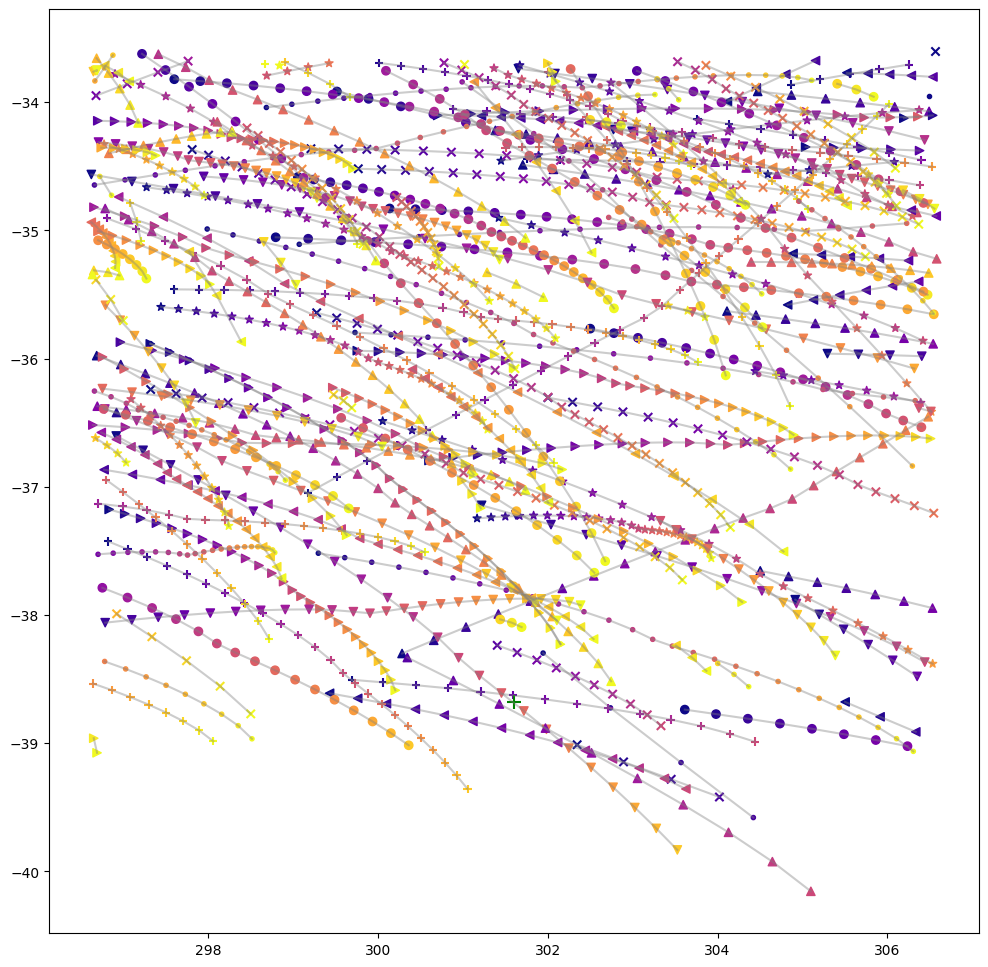

In [24]:
import pandas as pd 
from astropy.coordinates import SkyCoord
import matplotlib.colors as mplc
import matplotlib.pyplot as plt
import itertools

magLim = 20.0

brightResult = result.loc[result["Mv"]<= magLim].reset_index()
brightResult.drop("index", axis=1, inplace=True)

unqNames = pd.unique(brightResult["Name"])


coords = SkyCoord(brightResult["RA"], brightResult["Dec"], unit=(u.hourangle,u.deg))

brightResult = brightResult.assign(degRA=coords.ra.deg)
brightResult = brightResult.assign(degDec=coords.dec.deg)

fig, ax = plt.subplots(1,figsize =(12,12))


# ax.set_xlim([lims[0],lims[1]])
# ax.set_ylim([lims[2],lims[3]])
cnorm = mplc.Normalize(np.min(timeList.jd), np.max(timeList.jd))
markers = itertools.cycle((".","x","^","*","+","v","o", "<", ">"))
for i, name in  enumerate(unqNames):

    nameIDs = brightResult.index[brightResult["Name"]==name]

    coords = SkyCoord(brightResult.loc[nameIDs]["RA"], brightResult.loc[nameIDs]["Dec"], unit=(u.hourangle,u.deg))

    if len(nameIDs)>0:
        ax.plot(coords.ra.deg, coords.dec.deg, c="grey", alpha=0.4)
        ax.scatter(coords.ra.deg, coords.dec.deg, marker=next(markers), c=brightResult.loc[nameIDs]["epoch"], cmap="plasma", norm=cnorm)
ax.scatter(ra_i, dec_i, marker="+", s=100, c="g") #Center of seach area

fig.savefig(f"./posTracks_ra{ra_i}_dec{dec_i}_t{t_i.mjd}_Mv{magLim}_Skybot.png")


In [14]:
nameIDs = brightResult.index[brightResult["Name"]==" Veseli "]



brightResult.loc[nameIDs]

,Num,Name,RA,Dec,Class,Mv,epoch,degRA,degDec
4,2599,Veseli,19 58 46.1546,-38 30 18.088,MB>Middle,16.1,2458956.5,299.692311,-38.505024
68,2599,Veseli,20 00 15.3031,-38 31 32.392,MB>Middle,16.1,2458957.5,300.063763,-38.525664
132,2599,Veseli,20 01 46.3996,-38 32 50.753,MB>Middle,16.1,2458958.5,300.443332,-38.547431
197,2599,Veseli,20 03 18.0619,-38 34 16.981,MB>Middle,16.1,2458959.5,300.825258,-38.571384
265,2599,Veseli,20 04 49.7093,-38 35 51.723,MB>Middle,16.0,2458960.5,301.207122,-38.597701
336,2599,Veseli,20 06 21.0363,-38 37 35.296,MB>Middle,16.0,2458961.5,301.587651,-38.626471
405,2599,Veseli,20 07 51.8526,-38 39 28.143,MB>Middle,16.0,2458962.5,301.966052,-38.657818
471,2599,Veseli,20 09 22.0189,-38 41 30.977,MB>Middle,16.0,2458963.5,302.341745,-38.691938
540,2599,Veseli,20 10 51.4117,-38 43 44.922,MB>Middle,16.0,2458964.5,302.714215,-38.729145
611,2599,Veseli,20 12 19.8870,-38 46 11.767,MB>Middle,16.0,2458965.5,303.082862,-38.769935
